<a href="https://colab.research.google.com/github/yogesh-bhattarai/100_days_of_deeplearning/blob/main/day_21(transfer_learning_feature_extraction(data_agumentation)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 24.0MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.3MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras import Sequential
from keras.applications.vgg16 import VGG16

In [6]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [7]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
conv_base.trainable=False

In [9]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [10]:
batch_size=32
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [11]:
train_generator=train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'

)

test_generator=test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history=model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
625/625 [==============================] - 180s 265ms/step - loss: 0.3032 - accuracy: 0.8672 - val_loss: 0.2671 - val_accuracy: 0.8808
Epoch 2/10
625/625 [==============================] - 156s 250ms/step - loss: 0.2404 - accuracy: 0.8972 - val_loss: 0.2036 - val_accuracy: 0.9168
Epoch 3/10
625/625 [==============================] - 155s 248ms/step - loss: 0.2199 - accuracy: 0.9057 - val_loss: 0.1975 - val_accuracy: 0.9166
Epoch 4/10
625/625 [==============================] - 155s 248ms/step - loss: 0.2095 - accuracy: 0.9111 - val_loss: 0.1895 - val_accuracy: 0.9204
Epoch 5/10
625/625 [==============================] - 157s 251ms/step - loss: 0.2045 - accuracy: 0.9101 - val_loss: 0.2059 - val_accuracy: 0.9164
Epoch 6/10
625/625 [==============================] - 162s 260ms/step - loss: 0.1885 - accuracy: 0.9202 - val_loss: 0.1995 - val_accuracy: 0.9158
Epoch 7/10
625/625 [==============================] - 153s 244ms/step - loss: 0.1814 - accuracy: 0.9251 - val_loss: 0.2145 -

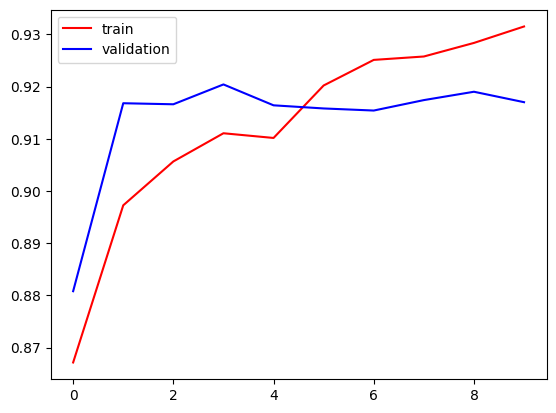

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()